## Installing the Modules

In [ ]:
%pip install statsmodels 
%pip install pandas 
%pip install numpy 
%pip install matplotlib
%pip install kagglehub
%pip install ee
%pip install tools

In [5]:
# import ee
import pandas as pd
import matplotlib.pyplot as plt

## Kaggle Hub login

In [ ]:
import kagglehub
kagglehub.login()

In [ ]:
# Authenticate
# ee.Authenticate()
# ee.Initialize(project='ee-cloudkitchen')

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the data
# # data = pd.read_csv('/Users/apple/.cache/kagglehub/datasets/himanshupoddar/zomato-bangalore-restaurants/versions/1/zomato.csv', parse_dates=['date'], index_col='date')
# data = pd.read_csv('/Users/apple/.cache/kagglehub/datasets/himanshupoddar/zomato-bangalore-restaurants/versions/1/zomato.csv')
# # Check for missing values
# print(data.isnull().sum())

# # Fill missing values (if any) with forward fill or other methods
# data.ffill()

# # Display first few rows to check the data
# print(data.head())
# # Plot sales and rainfall over time to visualize their trends
# # plt.figure(figsize=(10, 6))
# # plt.plot(data['sales'], label='Sales')
# # plt.plot(data['rainfall'], label='Rainfall', color='green')
# # plt.title('Sales and Rainfall Over Time')
# # plt.xlabel('Date')
# # plt.ylabel('Values')
# # plt.legend()
# # plt.show()


## Downloading the data set

In [ ]:
path = kagglehub.dataset_download("vananhtong/food-delivery-dataset")

print("Path to dataset files:", path)

## Loading the data set

In [ ]:

# # Load the data
# # data = pd.read_csv('/Users/apple/.cache/kagglehub/datasets/himanshupoddar/zomato-bangalore-restaurants/versions/1/zomato.csv', parse_dates=['date'], index_col='date')
train_data = pd.read_csv('/Users/apple/.cache/kagglehub/datasets/vananhtong/food-delivery-dataset/versions/1/train_df.csv')
test_data = pd.read_csv('/Users/apple/.cache/kagglehub/datasets/vananhtong/food-delivery-dataset/versions/1/test_df.csv')
# # Check for missing values
# print(train_data.isnull().sum())

# # Fill missing values (if any) with forward fill or other methods
# train_data.ffill()
train_data['Order_Date'] = pd.to_datetime(train_data['Order_Date'], format='%d-%m-%Y', errors='coerce')
test_data['Order_Date'] = pd.to_datetime(test_data['Order_Date'], format='%d-%m-%Y', errors='coerce')

# # Display first few rows to check the data
print(train_data.head())

In [ ]:
print(train_data['Order_Date'].max())
print(test_data['Order_Date'].max())

In [ ]:
print(train_data['Order_Date'].min())
print(test_data['Order_Date'].min())

In [ ]:
train_data.columns
test_data.columns

In [ ]:
unique_lat_long_combinations_train = train_data[['Restaurant_latitude', 'Restaurant_longitude']].drop_duplicates().shape[0]
print(unique_lat_long_combinations_train)
unique_lat_long_combinations_test = test_data[['Restaurant_latitude', 'Restaurant_longitude']].drop_duplicates().shape[0]
print(unique_lat_long_combinations_test)

## Preprocess the Training data

In [28]:
# Define the latitude and longitude range
lat_min, lat_max = 8.4, 37.6
long_min, long_max = 68.7, 97.25

# Group by Restaurant_latitude, Restaurant_longitude, and Order_Date and count the rows
grouped_data_train = train_data.groupby(
    ['Restaurant_latitude', 'Restaurant_longitude', 'Order_Date']
).agg(
    Number_of_Orders=('Time_taken(min)', 'size'),  # Count number of orders
    Avg_Delivery_Time=('Time_taken(min)', 'mean')  # Calculate average delivery time
).reset_index()
# Filter the grouped data for the specified latitude and longitude range
filtered_data_train= grouped_data_train[
    (grouped_data_train['Restaurant_latitude'] >= lat_min) &
    (grouped_data_train['Restaurant_latitude'] <= lat_max) &
    (grouped_data_train['Restaurant_longitude'] >= long_min) &
    (grouped_data_train['Restaurant_longitude'] <= long_max)
]
# Display the filtered data
print(filtered_data_train)

unique_lat_long_combinations_train = filtered_data_train[['Restaurant_latitude', 'Restaurant_longitude']].drop_duplicates().shape[0]
print(unique_lat_long_combinations_train)


      Restaurant_latitude  Restaurant_longitude Order_Date  Number_of_Orders  \
174              9.957144             76.296783 2022-02-11                 3   
175              9.957144             76.296783 2022-02-12                 4   
176              9.957144             76.296783 2022-02-13                 6   
177              9.957144             76.296783 2022-02-14                 4   
178              9.957144             76.296783 2022-02-15                 6   
...                   ...                   ...        ...               ...   
9545            30.914057             75.839820 2022-02-14                 2   
9546            30.914057             75.839820 2022-02-15                 3   
9547            30.914057             75.839820 2022-02-16                 6   
9548            30.914057             75.839820 2022-02-17                 3   
9549            30.914057             75.839820 2022-02-18                 4   

      Avg_Delivery_Time  
174          

## Preprocess the Testing Data

In [29]:
# Group by Restaurant_latitude, Restaurant_longitude, and Order_Date and count the rows
grouped_data_test = test_data.groupby(
    ['Restaurant_latitude', 'Restaurant_longitude', 'Order_Date']
).agg(
    Number_of_Orders=('Time_taken(min)', 'size'),  # Count number of orders
    Avg_Delivery_Time=('Time_taken(min)', 'mean')  # Calculate average delivery time
).reset_index()
# Filter the grouped data for the specified latitude and longitude range
filtered_data_test = grouped_data_test[
    (grouped_data_test['Restaurant_latitude'] >= lat_min) &
    (grouped_data_test['Restaurant_latitude'] <= lat_max) &
    (grouped_data_test['Restaurant_longitude'] >= long_min) &
    (grouped_data_test['Restaurant_longitude'] <= long_max)
]
# Display the filtered data
print(filtered_data_test)

unique_lat_long_combinations_test = filtered_data_test[['Restaurant_latitude', 'Restaurant_longitude']].drop_duplicates().shape[0]
print(unique_lat_long_combinations_test)


      Restaurant_latitude  Restaurant_longitude Order_Date  Number_of_Orders  \
56               9.957144             76.296783 2022-02-11                 1   
57               9.957144             76.296783 2022-02-12                 1   
58               9.957144             76.296783 2022-02-14                 1   
59               9.957144             76.296783 2022-02-18                 1   
60               9.959778             76.296106 2022-02-11                 2   
...                   ...                   ...        ...               ...   
3238            30.905562             75.832841 2022-02-17                 1   
3239            30.914057             75.839820 2022-02-11                 2   
3240            30.914057             75.839820 2022-02-13                 2   
3241            30.914057             75.839820 2022-02-15                 2   
3242            30.914057             75.839820 2022-02-17                 2   

      Avg_Delivery_Time  
56           

     Restaurant_latitude  Restaurant_longitude Order_Date  Number_of_Orders  \
174             9.957144             76.296783 2022-02-11                 3   
175             9.957144             76.296783 2022-02-12                 4   
176             9.957144             76.296783 2022-02-13                 6   
177             9.957144             76.296783 2022-02-14                 4   
178             9.957144             76.296783 2022-02-15                 6   
179             9.957144             76.296783 2022-02-16                 4   
180             9.957144             76.296783 2022-02-17                 4   
181             9.957144             76.296783 2022-02-18                 4   

     Avg_Delivery_Time  
174          21.000000  
175          31.500000  
176          20.000000  
177          23.500000  
178          22.833333  
179          28.750000  
180          29.000000  
181          36.250000  


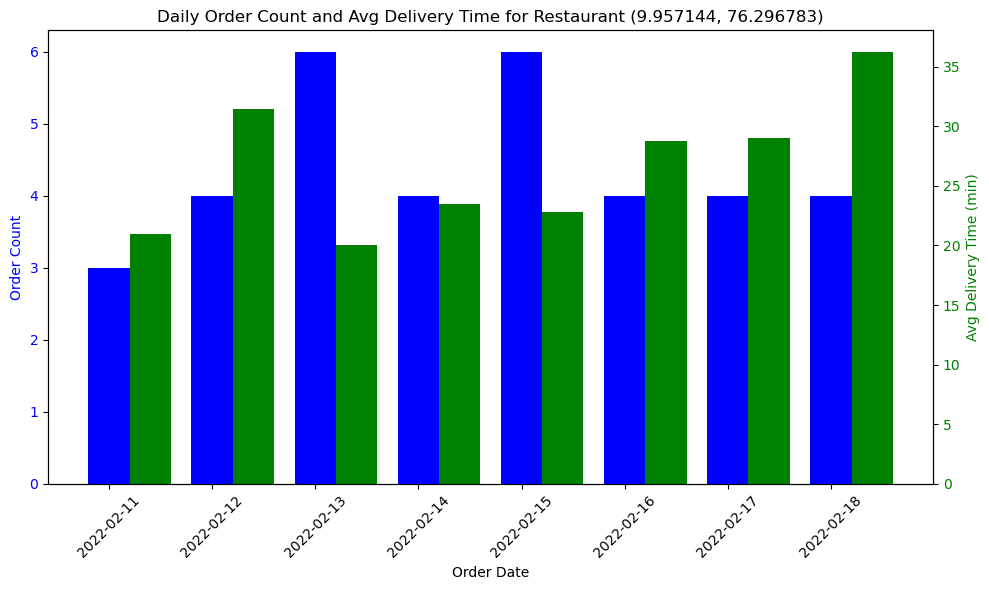

In [31]:
import matplotlib.pyplot as plt

# Filtering data for a particular restaurant 
restaurant_lat = 9.957144
restaurant_long = 76.296783 

# Filter the data for the selected restaurant
restaurant_data_train = filtered_data_train[
    (filtered_data_train['Restaurant_latitude'] == restaurant_lat) &
    (filtered_data_train['Restaurant_longitude'] == restaurant_long)
]
# print(restaurant_data_train)
# Plotting the double bar graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set the width of bars
bar_width = 0.4

# Create the bar positions for Order Count and Avg Delivery Time
bar_positions = pd.to_datetime(restaurant_data_train['Order_Date'])  # Using dates directly

# Plotting Order Count on the left Y-axis
ax1.bar(bar_positions, restaurant_data_train['Number_of_Orders'], color='b', width=bar_width, align='center', label='Order Count')
ax1.set_xlabel('Order Date')
ax1.set_ylabel('Order Count', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Create another axis for the Avg Delivery Time on the right Y-axis
ax2 = ax1.twinx()

# Shift the positions for the Avg Delivery Time bars to avoid overlap
ax2.bar(bar_positions + pd.Timedelta(days=0.4), restaurant_data_train['Avg_Delivery_Time'], color='g', width=bar_width, align='center', label='Avg Delivery Time')
ax2.set_ylabel('Avg Delivery Time (min)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Title and labels
plt.title(f'Daily Order Count and Avg Delivery Time for Restaurant ({restaurant_lat}, {restaurant_long})')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
filtered_data_test.columns

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# Check stationarity for sales data
check_stationarity(data['sales'])


In [ ]:
# Difference the sales data
data['sales_diff'] = data['sales'].diff().dropna()

# Re-check stationarity after differencing
check_stationarity(data['sales_diff'].dropna())


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Prepare the exogenous variable (rainfall)
exog = data[['rainfall']].dropna()

# Fit the ARIMAX model with sales as the dependent variable and rainfall as the exogenous variable
model = ARIMA(endog=data['sales'], exog=exog, order=(2, 1, 2))  # Adjust (p, d, q) based on ACF/PACF analysis
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots to find p and q values
plot_acf(data['sales_diff'].dropna(), lags=20)
plot_pacf(data['sales_diff'].dropna(), lags=20)
plt.show()


In [ ]:
# Forecast sales for the next 30 days using future rainfall data (if available)
forecast = model_fit.forecast(steps=30, exog=exog[-30:])

# Plot the forecasted sales
plt.figure(figsize=(10, 6))
plt.plot(data['sales'], label='Observed Sales')
plt.plot(pd.date_range(data.index[-1], periods=30, freq='D'), forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast Based on Rainfall')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Split the data into training and test sets
train_size = int(len(data) * 0.8)
train, test = data['sales'][:train_size], data['sales'][train_size:]
exog_train, exog_test = exog[:train_size], exog[train_size:]

# Fit the model on the training data
model = ARIMA(endog=train, exog=exog_train, order=(2, 1, 2))
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test), exog=exog_test)

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Test RMSE: {rmse}')

# Plot actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.plot(test, label='Actual Sales')
plt.plot(test.index, predictions, label='Predicted Sales', color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
